In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    print('success')
  except RuntimeError as e:
    print(e)


success


In [3]:
(X_train, y_train) , (X_test, y_test) = load_data()

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[6]')

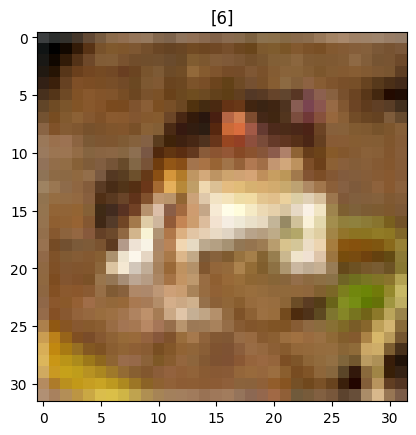

In [4]:
plt.imshow(X_train[0])
plt.title(y_train[0])

In [5]:
X_train = X_train.reshape((50000, 32,32,3))/255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

In [53]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False  # randomly flip images
        )
datagen.fit(X_train)

In [56]:
model = Sequential([Conv2D(256, kernel_size = (3,3),padding = 'same',input_shape = (32,32,3), activation = 'relu'),
                    BatchNormalization(),
                    MaxPooling2D((2,2)),
                                        BatchNormalization(),

                    Conv2D(128, kernel_size = (3,3),padding = 'same',activation = 'relu'),
                    MaxPooling2D((2,2)),
                    
                    Conv2D(64, kernel_size = (3,3),padding = 'same', activation = 'relu'),
                                        BatchNormalization(),

                   MaxPooling2D((2,2)),
                    Dropout(0.5),

                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax')])



In [57]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [34]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))


Num GPUs: 1


In [62]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                            epochs=10)

Epoch 1/10


<ipython-input-62-301de164232c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),


391/391 [==============================] - 55s 75ms/step - loss: 1.9498 - accuracy: 0.2842
Epoch 2/10
391/391 [==============================] - 31s 78ms/step - loss: 1.6044 - accuracy: 0.4163
Epoch 3/10
391/391 [==============================] - 29s 74ms/step - loss: 1.4445 - accuracy: 0.4836
Epoch 4/10
391/391 [==============================] - 29s 74ms/step - loss: 1.3133 - accuracy: 0.5378
Epoch 5/10
391/391 [==============================] - 30s 77ms/step - loss: 1.2201 - accuracy: 0.5772
Epoch 6/10
391/391 [==============================] - 29s 74ms/step - loss: 1.1447 - accuracy: 0.6057
Epoch 7/10
391/391 [==============================] - 30s 76ms/step - loss: 1.0910 - accuracy: 0.6282
Epoch 8/10
391/391 [==============================] - 29s 74ms/step - loss: 1.0341 - accuracy: 0.6476
Epoch 9/10
391/391 [==============================] - 33s 85ms/step - loss: 0.9968 - accuracy: 0.6625
Epoch 10/10
391/391 [==============================] - 37s 94ms/step - loss: 0.9625 - accurac

In [64]:
X_test = X_test.reshape((10000, 32,32,3))/255.0
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [65]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.7869 - accuracy: 0.7306


[0.7868504524230957, 0.7305999994277954]

In [69]:
loss = history.history['loss']
accuracy = history.history['accuracy']

Text(0.5, 1.0, 'Training loss and Accuracy')

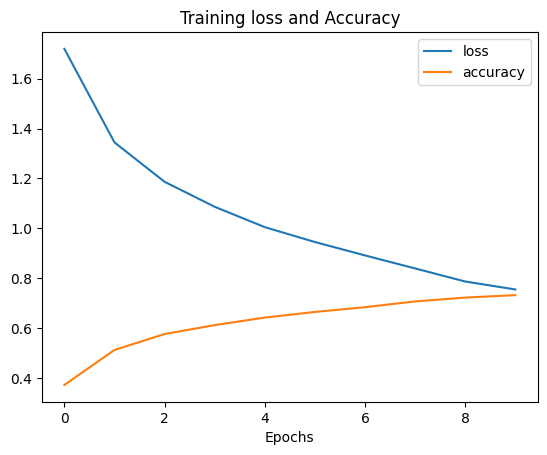

In [73]:
plt.plot(range(10), loss, label = 'loss')
plt.plot(range(10), accuracy,label = 'accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.title ('Training loss and Accuracy')

In [86]:
model.save('model.h5')

In [78]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [85]:
y_pred = [np.argmax(i) for i in y_pred]

Text(0.5, 1.0, 'Prediction: 3 vs ground truth 3')

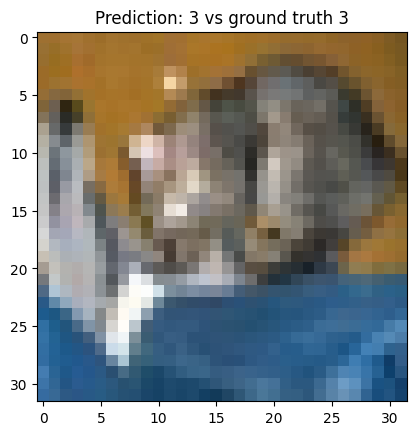

In [95]:
plt.imshow(X_test[0])
plt.title(f'Prediction: {y_pred[0]} vs ground truth {np.argmax(y_test[0])}')

Text(0.5, 1.0, 'Prediction: 9 vs ground truth 9')

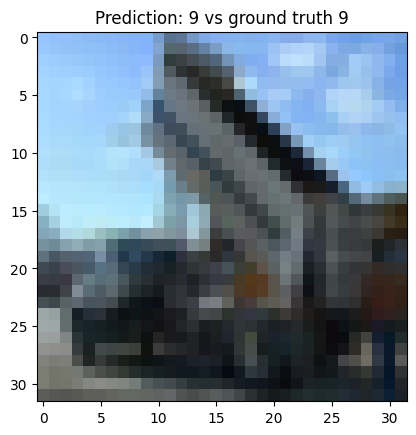

In [96]:
plt.imshow(X_test[50])
plt.title(f'Prediction: {y_pred[50]} vs ground truth {np.argmax(y_test[50])}')

Text(0.5, 1.0, 'Prediction: 8 vs ground truth 8')

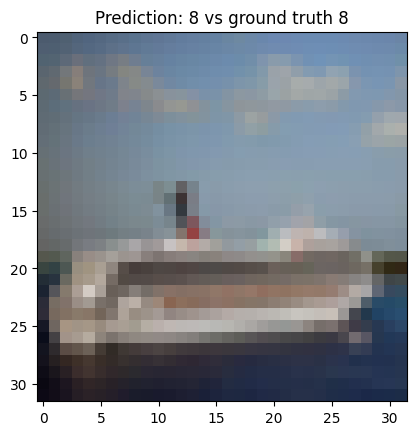

In [97]:
plt.imshow(X_test[73])
plt.title(f'Prediction: {y_pred[73]} vs ground truth {np.argmax(y_test[73])}')